In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# New section

In [ ]:
# read the data
df = pd.read_csv('/content/sample_data/Cardiac.csv')
# returns the first 5 rows
df.head(5)


,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


In [ ]:
df.tail()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
885,Male,0,1,0,1,0,0,0,1,0,0,0,no
886,Male,0,0,1,1,0,0,0,1,0,0,0,yes
887,Female,0,1,0,0,0,0,1,1,0,0,0,no
888,Male,1,1,0,1,0,0,0,1,0,0,0,yes


In [ ]:
df.shape

(889, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [ ]:
df.isnull().sum()

,0
Gender,0
Chain_smoker,0
Consumes_other_tobacco_products,0
HighBP,0
Obese,0
Diabetes,0
Metabolic_syndrome,0
Use_of_stimulant_drugs,0
Family_history,0
History_of_preeclampsia,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.0,0.120360,0.325565,0.0,0.0,0.0,0.0,1.0
Consumes_other_tobacco_products,889.0,0.838020,0.368640,0.0,1.0,1.0,1.0,1.0
HighBP,889.0,0.086614,0.281427,0.0,0.0,0.0,0.0,1.0
Obese,889.0,0.919010,0.272973,0.0,1.0,1.0,1.0,1.0
Diabetes,889.0,0.055118,0.228339,0.0,0.0,0.0,0.0,1.0
Metabolic_syndrome,889.0,0.042745,0.202395,0.0,0.0,0.0,0.0,1.0
Use_of_stimulant_drugs,889.0,0.082115,0.274694,0.0,0.0,0.0,0.0,1.0
Family_history,889.0,0.925759,0.262310,0.0,1.0,1.0,1.0,1.0
History_of_preeclampsia,889.0,0.017998,0.133018,0.0,0.0,0.0,0.0,1.0
CABG_history,889.0,0.021372,0.144704,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
df.groupby('UnderRisk')['UnderRisk'].value_counts()

,count
UnderRisk,
no,699
yes,190


In [ ]:
df['UnderRisk'] = df['UnderRisk'].replace({'no': 0, 'yes': 1})

In [ ]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,0,1,1,0,1,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
x = df.drop(['UnderRisk'],axis=1)
y = df['UnderRisk']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=1)

In [ ]:
x_train.shape
print(y_train.value_counts(),'\n')
x_test.shape
print(y_test.value_counts(),'\n')

UnderRisk
0    487
1    135
Name: count, dtype: int64 

UnderRisk
0    212
1     55
Name: count, dtype: int64 



In [ ]:
print("Train class distribution (%):")
print(y_train.value_counts(normalize=True) * 100, '\n')

print("Test class distribution (%):")
print(y_test.value_counts(normalize=True) * 100, '\n')

Train class distribution (%):
UnderRisk
0    78.29582
1    21.70418
Name: proportion, dtype: float64 

Test class distribution (%):
UnderRisk
0    79.400749
1    20.599251
Name: proportion, dtype: float64 



In [ ]:
x_temp,x_test,y_temp,y_test = train_test_split(x,y, test_size=0.2,random_state=1, stratify=y)

x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp, test_size=0.25,random_state=1, stratify=y_temp)


In [ ]:
# Fit dummies on train
x_train = pd.get_dummies(x_train, drop_first=True)

# Reindex val & test to match train dummy columns
x_val= pd.get_dummies(x_val, drop_first=True).reindex(columns=x_train.columns, fill_value=0)
x_test_ = pd.get_dummies(x_test, drop_first=True).reindex(columns=x_train.columns, fill_value=0)


In [ ]:
x_train.shape

(533, 13)

In [ ]:
model = LogisticRegression(random_state=1)
lg = model.fit(x_train,y_train)

# predicting on the training set
y_train_pred = lg.predict(x_train)
recall_score(y_train,y_train_pred)

0.03508771929824561

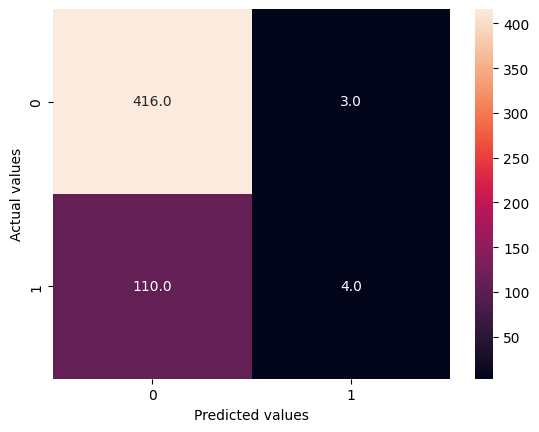

In [ ]:
# predicting on the training set
y_train_pred = lg.predict(x_train)
# plotting confusion matrox
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
sm=SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over,y_train_over=sm.fit_resample(x_train,y_train)

In [ ]:
print(x_train_over.shape)
rint(y_train_over.shape)

(838, 13)
(838,)


In [ ]:
print("Train class distribution (%):")
print(y_train_over.value_counts(normalize=True) * 100, '\n')

Train class distribution (%):
UnderRisk
0    50.0
1    50.0
Name: proportion, dtype: float64 



In [ ]:
lg1=LogisticRegression(random_state=1)
lg1.fit(x_train_over,y_train_over)

LogisticRegression(random_state=1)

In [ ]:
y_train_pred_over = lg.predict(x_train_over)
recall_score(y_train_over,y_train_pred_over)

0.021479713603818614

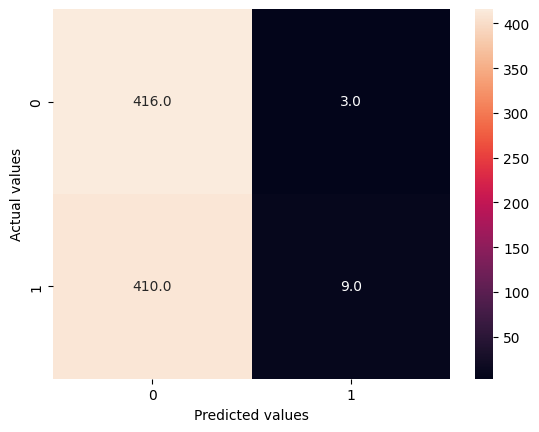

In [ ]:
y_train_pred_over = lg.predict(x_train_over)
# plotting confusion matrox
sns.heatmap(confusion_matrix(y_train_over,y_train_pred_over),annot=True,fmt='.1f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
lg1.score(x_train_over,y_train_over)

0.6909307875894988

In [ ]:
lg1.score(x_val_dummies,y_val)

0.601123595505618

Accuracy: 0.7052505966587113
Precision: 0.6673151750972762
Recall: 0.8186157517899761
F1 Score: 0.7352625937834941
[[248 171]
 [ 76 343]]


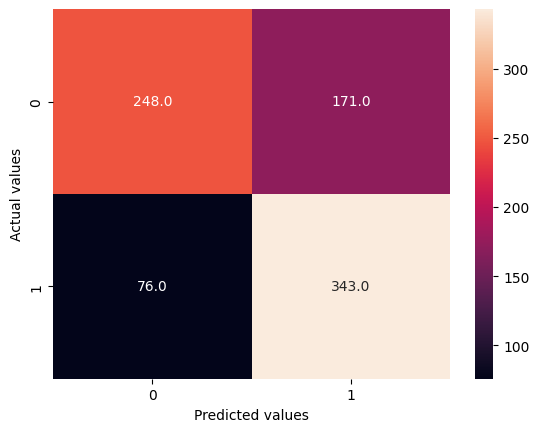

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance_classification_sklearn(model, y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state=1)
bag.fit(x_train_over, y_train_over)

# Predict on validation set
y_train_over_pred = bag.predict(x_train_over)

# Pass actual y and predicted y
model_performance_classification_sklearn(bag, y_train_over, y_train_over_pred)
cm=confusion_matrix(y_train_over,y_train_over_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt='.1f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

Accuracy: 0.7052505966587113
Precision: 0.6673151750972762
Recall: 0.8186157517899761
F1 Score: 0.7352625937834941
[[248 171]
 [ 76 343]]


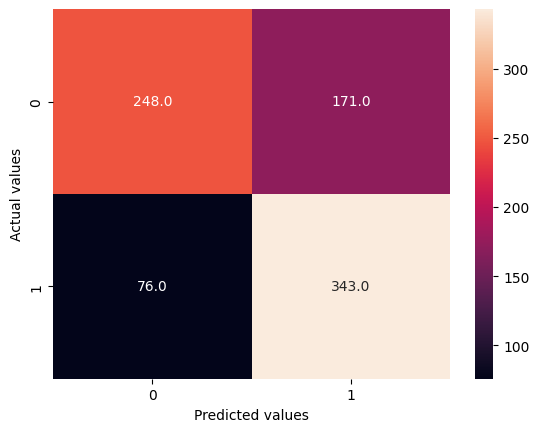

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(x_train_over, y_train_over)

model_performance_classification_sklearn(rf, y_train_over, y_train_over_pred)

def model_performance_classification_sklearn(model, y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    cm=confusion_matrix(y_train_over,y_train_over_pred)
    print(cm)
    sns.heatmap(cm,annot=True,fmt='.1f')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

models = []  # Empty list to store all the models

# Appending models into the list

models.append(("Bagging", BaggingClassifier(random_state=1)))

models.append(("Random forest", RandomForestClassifier(random_state=1)))

models.append(("LR", LogisticRegression(random_state=1)))

models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores

names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:

    scoring = "recall"

    kfold = StratifiedKFold(

        n_splits=5, shuffle=True, random_state=1

    )  # Setting number of splits equal to 5

    cv_result = cross_val_score(

        estimator=model, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold

    )

    results.append(cv_result)

    names.append(name)

    print("{}: {}".format(name, cv_result.mean() * 100))


Cross-Validation Performance:

Bagging: 80.19219736087206
Random forest: 79.95697074010327
LR: 81.62076878944349
dtree: 79.95410212277683


In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Define parameter grid
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Model
model = AdaBoostClassifier(random_state=1)

# Randomized Search
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fit to oversampled data
randomized_cv.fit(x_train_over, y_train_over)

# Best parameters
print("Best parameters:", randomized_cv.best_params_)
print("Best recall score:", randomized_cv.best_score_)

Best parameters: {'n_estimators': np.int64(50), 'learning_rate': 0.01, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}
Best recall score: 0.9952380952380953


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[205 214]
 [ 71 348]]


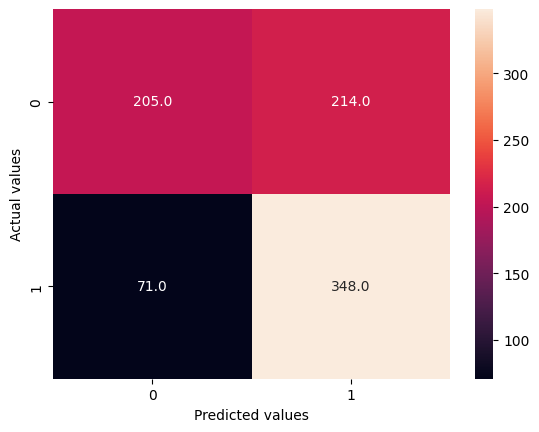

Accuracy: 0.6599045346062052
Precision: 0.6192170818505338
Recall: 0.8305489260143198
F1 Score: 0.709480122324159
[[205 214]
 [ 71 348]]


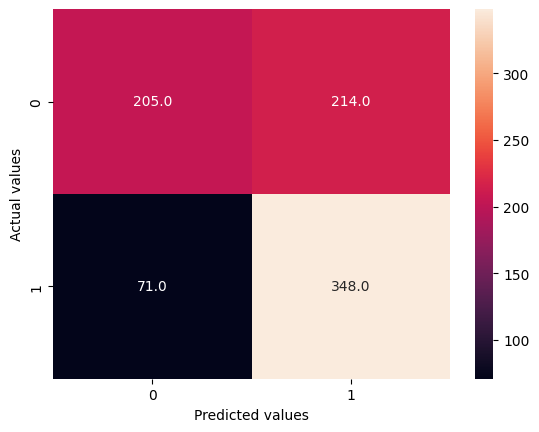

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

rus = RandomUnderSampler(random_state=1)

x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

# Apply one-hot encoding to handle the 'Other' category in 'Gender' for undersampled data
x_train_un = pd.get_dummies(x_train_un, columns=['Gender'], drop_first=True)


model1 = AdaBoostClassifier(random_state=1)

model1.fit(x_train_un, y_train_un)

# Note: model_performance_classification_sklearn function expects model, y_true, y_pred.
# You are currently passing model, x_train_un, y_train_un.
# I will keep it as is based on your original code but you might want to predict first:
# y_train_un_pred = model1.predict(x_train_un)
# model_performance_classification_sklearn(model1, y_train_un, y_train_un_pred)
model_performance_classification_sklearn(model1, y_train_un, y_train_un)

# Ensure columns match x_train_un after one-hot encoding
x_train_over = x_train_over.reindex(columns=x_train_un.columns, fill_value=0)


model2 = AdaBoostClassifier(random_state=1)

model2.fit(x_train_over, y_train_over)

# Predict on oversampled data
y_train_over_pred = model2.predict(x_train_over)

# Pass actual y and predicted y for oversampled data
model_performance_classification_sklearn(model2, y_train_over, y_train_over_pred)


def model_performance_classification_sklearn(model, y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    cm=confusion_matrix(y_train_over,y_train_over_pred)
    print(cm)
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()

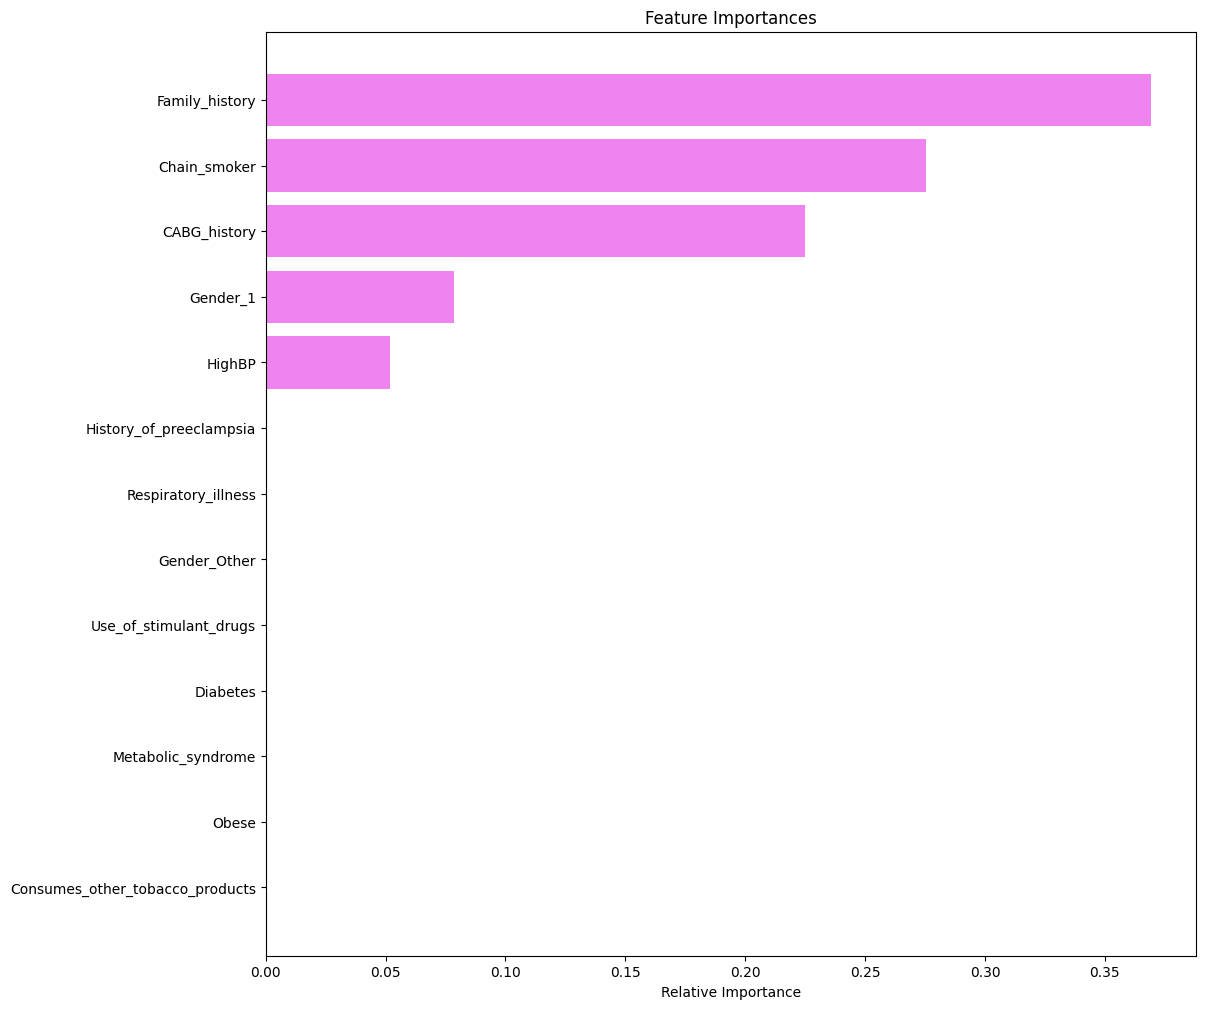

In [ ]:
import matplotlib.pyplot as plt

model1 = AdaBoostClassifier(random_state=1)

model1.fit(x_train_un, y_train_un)

feature_names = x_train_un.columns

importances = model1.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(12, 12))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel("Relative Importance")

plt.show()